# Chapter 12: Estimation of Linear Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

In [2]:
MASchools = pd.read_csv("../data/MASchools.csv")

In [3]:
df = MASchools.iloc[:, [12, 6,7,8,10,14]].copy()
df.head(7).round(2)

,score4,exptot,scratio,special,stratio,salary
0,714,4646,16.6,14.6,19.0,34.36
1,731,4930,5.7,17.4,22.6,38.06
2,704,4281,7.5,12.1,19.3,32.49
3,704,4826,8.6,21.1,17.9,33.11
4,701,4824,6.1,16.8,17.5,34.44
5,714,6454,7.7,17.2,15.7,NaN
6,725,5537,5.4,11.3,17.1,41.62


In [4]:
df.isna().mean()*100

score4      0.000000
exptot      0.000000
scratio     4.090909
special     0.000000
stratio     0.000000
salary     11.363636
dtype: float64

In [5]:
num_na = df.isna().sum().sum()
num_complete = len(df) - num_na
print("True: ",num_na, "False: ", num_complete)

True:  34 False:  186


In [6]:
salarymean = df['salary'].mean()
salaryimputed = df['salary'].fillna(salarymean)
print(salarymean)
print(salaryimputed.mean())
print(df['salary'].std())
print(salaryimputed.std())

35.992697446774216
35.99269744677423
3.1905555712426232
3.0029293928495764


In [7]:
df['salary'].isna().values

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [8]:
df1 = df.dropna().copy()
len(df1)

186

## Baseline Model

In [9]:
def LLnorm(mean1, standdev):
    p = scipy.stats.norm(mean1, standdev).pdf(df1['score4'])
    LL = np.sum(np.log(p))
    return(-1*LL)
res1 = scipy.optimize.minimize(LLnorm, x0 = [700], args=(50,))
print(res1)

      fun: 907.3761934976435
 hess_inv: array([[13.44090285]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([709.03757973])


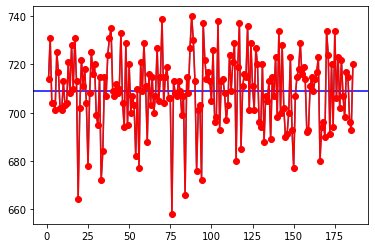

In [10]:
# R:
# SST = sum((df1$score4 - 709)^2)
# SST
# Python:
x = np.arange(1, len(df1)+1)
plt.plot(x, df1['score4'])
plt.axhline(709, color='blue')
plt.plot(x, df1['score4'], linestyle='-', marker='o', color='r')
plt.show()

In [11]:
SST = np.sum((df1['score4'] - 709)**2)
print(SST)


44087


## Linear Regression Model

In [12]:
def LLnorm(params):
    b0, b1, b2, b3, b4, b5, standdev = params
    mean1 = b0 + b1*df1['exptot'] + b2*df1['scratio'] + b3*df1['special'] + b4*df1['stratio'] + b5*df1['salary']
    p = scipy.stats.norm(mean1, standdev).pdf(df1['score4'])
    LL = np.sum(np.log(p))
    return(-1*LL)

In [13]:
res2 = scipy.optimize.minimize(LLnorm, x0 = [709, 0, 0, 0, 0, 0, 15.4])
print(res2)

      fun: 772.462722882404
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])
      jac: array([-2.95104980e-02, -1.33883463e+03,  2.52403259e+00,  8.03593445e+00,
        7.24870300e+00, -1.47317505e+01,  6.79016113e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 36
      nit: 0
     njev: 3
   status: 2
  success: False
        x: array([709. ,   0. ,   0. ,   0. ,   0. ,   0. ,  15.4])


C:\Users\stefan\AppData\Local\Temp/ipykernel_9928/3372930880.py:5: RuntimeWarning: divide by zero encountered in log
  LL = np.sum(np.log(p))
c:\ProgramData\Anaconda3\envs\book\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\stefan\AppData\Local\Temp/ipykernel_9928/3372930880.py:5: RuntimeWarning: divide by zero encountered in log
  LL = np.sum(np.log(p))


## Regression Equations

In [14]:
res2.x

array([709. ,   0. ,   0. ,   0. ,   0. ,   0. ,  15.4])

In [15]:
df1['baseline'] = 709
df1['regression'] = df1[['exptot', 'scratio', 'special', 'stratio', 'salary']].dot(res2.x[1:6]) + res2.x[0]
df1['regerror'] = df1['score4'] - df1['regression']
df1.round(3).iloc[0:5, [0,6,7,8]]


,score4,baseline,regression,regerror
0,714,709,709.0,5.0
1,731,709,709.0,22.0
2,704,709,709.0,-5.0
3,704,709,709.0,-5.0
4,701,709,709.0,-8.0


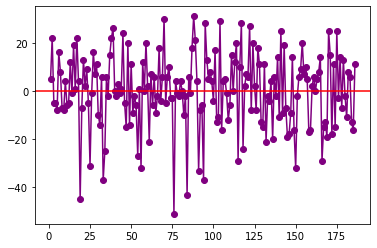

In [16]:
x = np.arange(1, len(df1)+1)
plt.plot(x, df1['regerror'], color='purple', marker='o', linestyle='-')
plt.axhline(0, color='red')
plt.show()

In [18]:
SSE = np.sum((df1['regression'] - df1['score4'])**2)
print(SSE)


44087.0


In [20]:
Rsquare = 1 - (SSE/SST)
print(Rsquare)


0.0


In [21]:
varbaseline = 15.39563**2
varregression = 13.1042240**2
print(1 - (varregression/varbaseline))

0.2755178562766506


### Statistical Significance

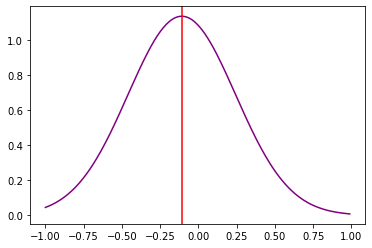

In [33]:
m1 = -0.1083852
se1 = 0.3516757
x = np.arange(-1, 1, 0.01)
p = scipy.stats.norm(m1, se1).pdf(x)
plt.plot(x, p, color='purple', linestyle='-')
plt.axvline(m1, color='red')
plt.show()

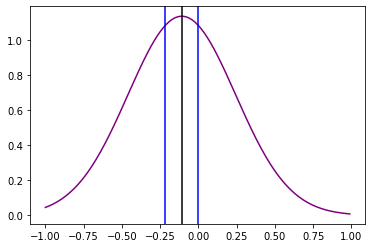

0.7579328585323364


In [39]:
gap = abs(m1 - 0)
x = np.arange(-1, 1, 0.01)
p = scipy.stats.norm(m1, se1).pdf(x)
plt.plot(x, p, color='purple', linestyle='-')
plt.axvline(m1, color='black')
plt.axvline(m1 - gap, color='blue')
plt.axvline(m1 + gap, color='blue')
plt.show()
a = scipy.stats.norm(m1, se1).cdf(m1 + gap)
b = scipy.stats.norm(m1, se1).cdf(m1 - gap)
pval1 = 1 - (a - b)
print(pval1)

### Assumptions of the Regression Model

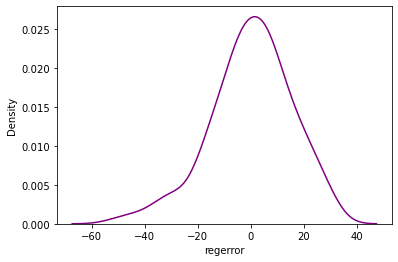

ShapiroResult(statistic=0.9795407056808472, pvalue=0.007901106961071491)


In [43]:
sns.kdeplot(df1['regerror'], color='purple')
plt.show()
shapiro = scipy.stats.shapiro(df1['regerror'])
print(shapiro)

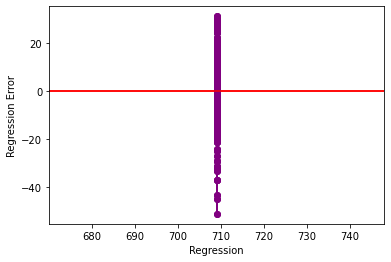

In [47]:
plt.plot(df1['regression'], df1['regerror'], color='purple', marker='o', linestyle='-')
plt.axhline(0, color='red')
plt.plot(df1['regression'], df1['regerror'], color='purple', marker='o', linestyle='-')
plt.axhline(0, color='red')
plt.xlabel('Regression')
plt.ylabel('Regression Error')
plt.show()


### Regression Functions in R and Python

In [52]:
from statsmodels.formula.api import ols
res3 = ols("score4 ~ exptot + scratio + special + stratio + salary", data=df1).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                 score4   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     13.69
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.50e-11
Time:                        12:39:54   Log-Likelihood:                -742.49
No. Observations:                 186   AIC:                             1497.
Df Residuals:                     180   BIC:                             1516.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    714.7035     16.343     43.730      0.0